In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

import tensorflow as tf
keras = tf.keras

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM

In [2]:
zentec_data = pd.read_csv('/kaggle/input/nse-defence-stocks-india/ZENTEC.NS.csv', index_col='Date')

In [3]:
zentec_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-03-30,49.000000,58.500000,49.000000,55.700001,54.449329,345867
2015-04-06,57.250000,82.800003,56.500000,79.199997,77.421661,3020956
2015-04-13,79.650002,79.699997,72.599998,73.800003,72.142921,610307
2015-04-20,74.900002,75.000000,60.599998,61.900002,60.510117,515377
2015-04-27,62.400002,63.450001,50.450001,58.400002,57.088711,613418


<AxesSubplot:xlabel='Date'>

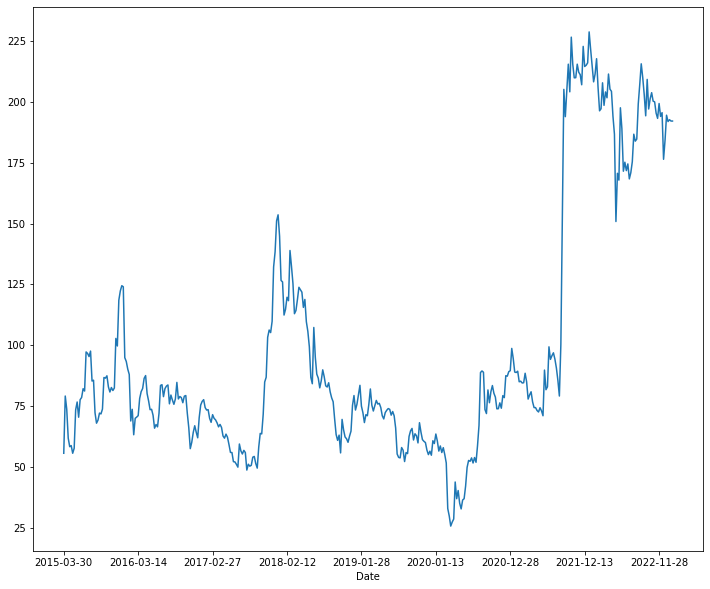

In [4]:
zentec_data['Close'].plot(figsize=(12,10))

In [5]:
zentec_data = zentec_data.dropna()

In [6]:
scaled_zentec_data = scaler.fit_transform(zentec_data)

In [7]:
scaled_zentec_data.shape

(410, 6)

In [8]:
look_back = 6

zentec_data_generator = TimeseriesGenerator(scaled_zentec_data, scaled_zentec_data, length=look_back, batch_size=1)

In [9]:
zentec_model = Sequential()

n_features = scaled_zentec_data.shape[1]

zentec_model.add(LSTM(128, activation='relu', return_sequences=True , input_shape=(look_back,n_features)))
zentec_model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(look_back,n_features)))
zentec_model.add(LSTM(512, activation='relu',  input_shape=(look_back,n_features)))

zentec_model.add(Dense(n_features))

zentec_model.compile(optimizer='adam', loss='mse')

2023-02-04 06:05:18.338599: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
zentec_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 128)            69120     
_________________________________________________________________
lstm_1 (LSTM)                (None, 6, 256)            394240    
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               1574912   
_________________________________________________________________
dense (Dense)                (None, 6)                 3078      
Total params: 2,041,350
Trainable params: 2,041,350
Non-trainable params: 0
_________________________________________________________________


In [11]:
zentec_model.fit(zentec_data_generator, epochs=500)

2023-02-04 06:05:51.280950: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
404/404 [==============================] - 17s 31ms/step - loss: 0.0209
Epoch 2/500
404/404 [==============================] - 14s 34ms/step - loss: 0.0081
Epoch 3/500
404/404 [==============================] - 12s 31ms/step - loss: 0.0065
Epoch 4/500
404/404 [==============================] - 13s 31ms/step - loss: 0.0063
Epoch 5/500
404/404 [==============================] - 13s 32ms/step - loss: 0.0053
Epoch 6/500
404/404 [==============================] - 13s 31ms/step - loss: 0.0047
Epoch 7/500
404/404 [==============================] - 13s 32ms/step - loss: 0.0036
Epoch 8/500
404/404 [==============================] - 12s 30ms/step - loss: 0.0030
Epoch 9/500
404/404 [==============================] - 12s 30ms/step - loss: 0.0030
Epoch 10/500
404/404 [==============================] - 13s 32ms/step - loss: 0.0031
Epoch 11/500
404/404 [==============================] - 12s 30ms/step - loss: 0.0027
Epoch 12/500
404/404 [==============================] - 12s 30ms/step - lo

In [12]:
zentec_model.save('/kaggle/working/zentec_model.h5')

In [13]:
# for exporting important objects of model
import joblib

# create PKL files of important objects required for project
# these are required for prediction of future stock prices and also for the flask app
joblib.dump(scaler, "/kaggle/working/scaler.pkl")
joblib.dump(scaled_zentec_data, "/kaggle/working/scaled_zentec_data.pkl")
joblib.dump(look_back, "/kaggle/working/look_back.pkl")

['/kaggle/working/look_back.pkl']

<AxesSubplot:>

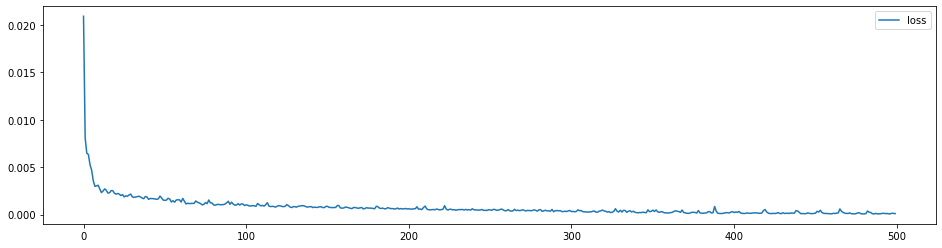

In [14]:
zentec_loss = pd.DataFrame(zentec_model.history.history)
zentec_loss.plot(figsize=(16,4))